In [17]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

### Step1 - Exploring the dataset

In [18]:
dataset = pd.read_csv('pima-indians-diabetes.csv')
print(len(dataset))

dataset.head()

768


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
# values of columns like 'Glucose'... can't be accpted as zeros becoz it affect the outcome
# we can replace such values with mean of respective columns as it would not affect the original data

#replace zeros with numpy nan then again replace it by mean
zero_not_accepted = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

for column in zero_not_accepted:
    dataset[column] = dataset[column].replace(0,np.NaN) 
    
    mean = int(dataset[column].mean(skipna = True))
    
    dataset[column] = dataset[column].replace(np.NaN,mean)

In [20]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,155.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,155.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


### Step2 - Splitting the data for training and testing 

In [21]:
#split the dataset 
x = dataset.iloc[:,0:8]
y = dataset.iloc[:,8]

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)



In [23]:
# we will scale our dataset for same units when computing distance or assuming normality
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

### Step3- Model fitting 

In [25]:
import math
math.sqrt(len(y_test)) 
#we approx k=11

12.409673645990857

In [44]:
k_range = list(range(1,31))
scores = []

for k in k_range:
    
    knn = KNeighborsClassifier(n_neighbors = k, metric='euclidean')

    knn.fit(x_train,y_train)
    
    y_pred = knn.predict(x_test)
    scores.append(accuracy_score(y_test,y_pred))
    
print(scores)   



[0.7532467532467533, 0.7467532467532467, 0.7857142857142857, 0.7987012987012987, 0.7597402597402597, 0.7857142857142857, 0.7922077922077922, 0.8181818181818182, 0.7987012987012987, 0.8051948051948052, 0.8181818181818182, 0.7987012987012987, 0.8181818181818182, 0.7987012987012987, 0.8116883116883117, 0.7857142857142857, 0.7857142857142857, 0.7922077922077922, 0.7792207792207793, 0.7857142857142857, 0.7792207792207793, 0.7922077922077922, 0.7857142857142857, 0.7857142857142857, 0.7922077922077922, 0.7792207792207793, 0.8181818181818182, 0.8051948051948052, 0.7987012987012987, 0.7987012987012987]


Text(0, 0.5, 'accuracy ')

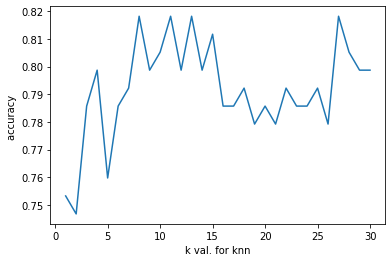

In [49]:
#visualization of k values by precision levels
import matplotlib.pyplot as plt 
%matplotlib inline

plt.plot(k_range,scores)
plt.xlabel("k val. for knn")
plt.ylabel("accuracy ")

#accuracy val high at k=8,10,11,13,27

In [45]:
y_pred = knn.predict(x_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

### Step4 - Evaluation of the model

In [38]:
#evaluating the model
conf_m = confusion_matrix(y_test,y_pred)
print(conf_m)

[[94 13]
 [15 32]]


In [39]:
#printing the f1_score
print(f1_score(y_test,y_pred))

0.6956521739130436


In [41]:
#printing the accuracy score
print(accuracy_score(y_test,y_pred)*100,'%')

81.81818181818183 %


## Different techniques

#### (K- fold cross validation)

In [55]:
from sklearn.model_selection import cross_val_score

k_range = list(range(1,31))
k_scores = []

for k in k_range:
    
    knn = KNeighborsClassifier(n_neighbors = k, metric='euclidean')
    
    scores = cross_val_score(knn, x ,y ,cv = 10 , scoring = 'accuracy')
    k_scores.append(scores.mean())
    
print(k_scores)     

[0.6953178400546822, 0.7227101845522899, 0.7057587149692413, 0.7187799043062201, 0.7083732057416269, 0.7188311688311688, 0.720164046479836, 0.7409432672590567, 0.7384654818865345, 0.7357655502392344, 0.7344839371155161, 0.7422761449077239, 0.7384142173615859, 0.7410287081339714, 0.7397129186602871, 0.7358339029391662, 0.7319377990430622, 0.7345181134654819, 0.7319207108680792, 0.7410287081339713, 0.748855092276145, 0.7384142173615859, 0.743626110731374, 0.7397300068352701, 0.743626110731374, 0.73973000683527, 0.73973000683527, 0.739764183185236, 0.7345522898154477, 0.7397470950102529]
0.748855092276145


In [61]:
#printing the k-val where k-score is max.

k_max = 0
index = 0

while index < len(k_scores):

    if k_scores[index] > k_max:
        k_max = k_scores[index] 
    index = index + 1    
        
print("maximum accuracy at k =", k_scores.index(k_max),"with accuracy", k_max*100,"%")        


maximum accuracy at k = 20 with accuracy 74.8855092276145 %


Text(0, 0.5, 'accuracy ')

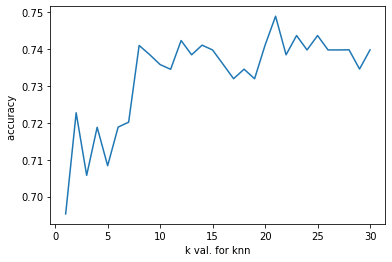

In [54]:
#visualization of k values by precision levels
import matplotlib.pyplot as plt 
%matplotlib inline

plt.plot(k_range,k_scores)
plt.xlabel("k val. for knn")
plt.ylabel("accuracy ")


#### Parameter tuning using GridsearchCV

In [82]:
from sklearn.model_selection import GridSearchCV

k_range = list(range(0,31))

#param_grid = dict(n_neighbors = k_range)

grid = GridSearchCV(estimator=KNeighborsClassifier(n_neighbors = 13, metric='euclidean') , param_grid = dict(n_neighbors = k_range), cv=10 , scoring = 'accuracy')

grid.fit(x,y)


print(grid.best_score_*100,"%")
print(rand.best_params_)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Expected n_neighbors > 0. Got 0

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Expected n_neighbors > 0. Got 0

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Expected n_neighbors > 0. Got 0

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-tes

74.8855092276145 %
{'weights': 'uniform', 'n_neighbors': 21}


#### hyper-Parameter tuning using RandomsearchCV

In [84]:
from sklearn.model_selection import RandomizedSearchCV



k_range = list(range(0,31))
weights_options = ['uniform','distance']

knn = KNeighborsClassifier(n_neighbors = 13, metric='euclidean' )

param_dist = dict(n_neighbors = k_range , weights = weights_options)

rand = RandomizedSearchCV(knn, param_dist, cv = 10, scoring = 'accuracy', n_iter = 10, random_state=5)

rand.fit(x,y)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='euclidean',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=13,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'n_neighbors': [0, 1, 2, 3, 4, 5, 6, 7,
                                                        8, 9, 10, 11, 12, 13,
                                                        14, 15, 16, 17, 18, 19,
                                                        20, 21, 22, 23, 24, 25,
                                                        26, 27, 28, 29, ...],
                                        'weights': ['uniform', 'distance']

In [81]:
print(rand.best_score_*100,'%')
print(rand.best_params_)

74.8855092276145 %
{'weights': 'uniform', 'n_neighbors': 21}
